This code is designed to puggyback of of Mustafa's previously written code to go through various different collusion scanario's in an attempt to see which one is the 'optimal' amount of collusion to experiance within the Ethereum marketplace.

In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from numpy import cumsum

In [2]:
#define functions for future analysis

def collusion_scenario(p, epsilon, n=1000, gas_target=15000000, init_bf=100, txn_fee=101, d=8):
    
    block_sizes = [gas_target]
    mempool = gas_target
    revenue = [0]
    mem_overfilled = mempool > 2 * gas_target
    base_fee = [init_bf]
    colluder_revenue = [0]
    myopic_revenue = [0]
    mempools = []
    
    
    for i in range(n - 1):
        
        colluding = random.random() < p
        if colluding:
            mined_amount = gas_target - epsilon
        else:
            mined_amount = (2 * gas_target) if mem_overfilled else mempool
        
        mempool -= mined_amount
        new_basefee = basefee(base_fee[i], mined_amount, gas_target, d)
        base_fee.append(new_basefee)
        block_sizes.append(mined_amount)
        block_revenue = (txn_fee - base_fee[i]) * mined_amount
        
        revenue.append(block_revenue) 
        
        if colluding:
            colluder_revenue.append(block_revenue)
        else:
            myopic_revenue.append(block_revenue)
            
        mempool += gas_target
        mem_overfilled = mempool > 2 * gas_target
        mempools.append(mempool)
    
    data = {
        "Basefee" : base_fee,
        "Block Sizes" : block_sizes,
        "Overall Revenues" : revenue,
        "Myopic Revenues" : myopic_revenue,
        "Colluder Revenues" : colluder_revenue,
        "Avg Revenue per Colluder": sum(colluder_revenue) / len(colluder_revenue) - 1,
        "Avg Revenue per Myopic": sum(myopic_revenue) / len(myopic_revenue) - 1,
        "Mempools": mempools
    }
    
    return data

def basefee(previous, mined_amount, gas_target, d): 
    
    return previous*(1+(1/d)*((mined_amount-gas_target)/gas_target))
    

To get a good mix of possibilities for different collusion scenario's within our framework, we will use 10%, 20%, 40%, 60%, 80%



Now to start with 10%

In [3]:
sim = collusion_scenario(.1, 1500000, 500)
controll_sim = collusion_scenario(0, 1500000, 500)

print("Total Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Total Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Total Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Average Colluder Revenue:", sim["Avg Revenue per Colluder"])
print("Average Myopic Revenue:", sim["Avg Revenue per Myopic"])
print("Average Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]) / \
      len(controll_sim["Overall Revenues"]))

Total Revenue Under No Collusion: 7485000000.0
Total Myopic Revenue: 11745466588.36813
Total Colluder Revenues: 1501054320.071156
Average Colluder Revenue: 23093142.385710094
Average Myopic Revenue: 26939142.55130305
Average Revenue Under No Collusion: 14970000.0


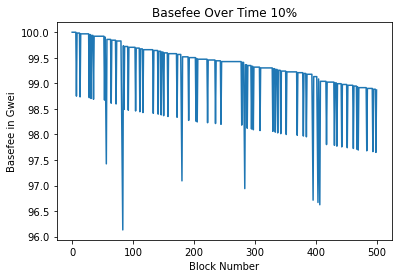

In [4]:
##plot basefee
plt.title("Basefee Over Time 10%")
plt.xlabel("Block Number")
plt.ylabel("Basefee in Gwei")
plt.plot(sim["Basefee"])
#plt.savefig('basefee_collusion_10p')

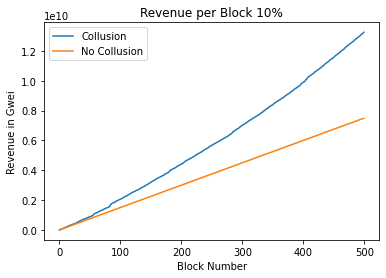

In [5]:
##plot revenue per block
plt.title("Revenue per Block 10%")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(cumsum(sim["Overall Revenues"]), label="Collusion")
plt.plot(cumsum(controll_sim["Overall Revenues"]), label="No Collusion")
plt.legend(loc="upper left")

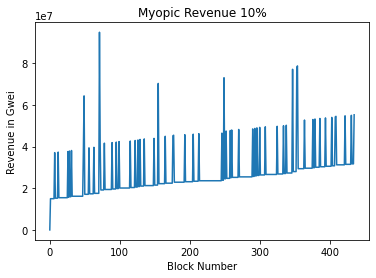

In [6]:
##plot myopic revenue
plt.title("Myopic Revenue 10%")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Myopic Revenues"])
#plt.savefig('myopic_revenue_10p')

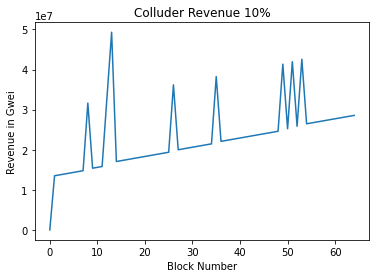

In [7]:
##plot colluder revenue
plt.title("Colluder Revenue 10%")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Colluder Revenues"])
#plt.savefig('colluder_revenue_10p')

Now to move on to 20%

In [8]:
sim = collusion_scenario(.2, 1500000, 500)
controll_sim = collusion_scenario(0, 1500000, 500)

print("Total Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Total Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Total Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Average Colluder Revenue:", sim["Avg Revenue per Colluder"])
print("Average Myopic Revenue:", sim["Avg Revenue per Myopic"])
print("Average Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]) / \
      len(controll_sim["Overall Revenues"]))

Total Revenue Under No Collusion: 7485000000.0
Total Myopic Revenue: 14330746061.85954
Total Colluder Revenues: 3086410999.43182
Average Colluder Revenue: 29965154.334289514
Average Myopic Revenue: 36006898.65291342
Average Revenue Under No Collusion: 14970000.0


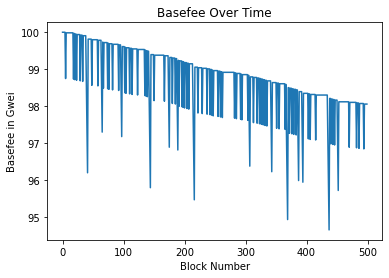

In [9]:
##plot basefee
plt.title("Basefee Over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee in Gwei")
plt.plot(sim["Basefee"])

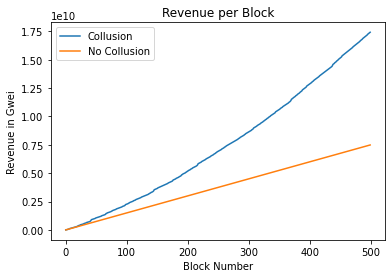

In [10]:
##plot revenue per block
plt.title("Revenue per Block")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(cumsum(sim["Overall Revenues"]), label="Collusion")
plt.plot(cumsum(controll_sim["Overall Revenues"]), label="No Collusion")
plt.legend(loc="upper left")

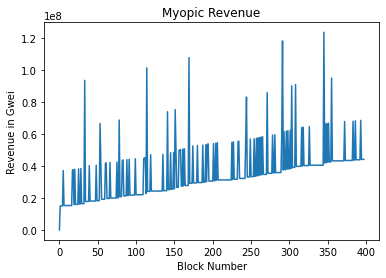

In [11]:
##plot myopic revenue
plt.title("Myopic Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Myopic Revenues"])

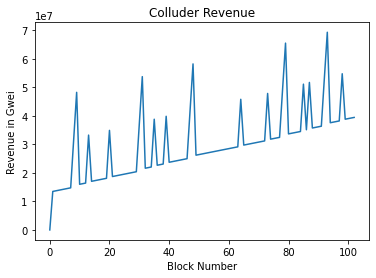

In [12]:
##plot colluder revenue
plt.title("Colluder Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Colluder Revenues"])

Now to move on to 40%

In [13]:
sim = collusion_scenario(.4, 1500000, 500)
controll_sim = collusion_scenario(0, 1500000, 500)

print("Total Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Total Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Total Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Average Colluder Revenue:", sim["Avg Revenue per Colluder"])
print("Average Myopic Revenue:", sim["Avg Revenue per Myopic"])
print("Average Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]) / \
      len(controll_sim["Overall Revenues"]))

Total Revenue Under No Collusion: 7485000000.0
Total Myopic Revenue: 21051510219.558083
Total Colluder Revenues: 11222514766.325838
Average Colluder Revenue: 55833405.79764099
Average Myopic Revenue: 70171699.73186028
Average Revenue Under No Collusion: 14970000.0


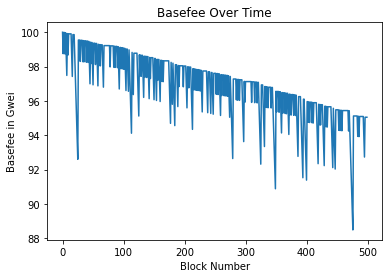

In [14]:
##plot basefee
plt.title("Basefee Over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee in Gwei")
plt.plot(sim["Basefee"])

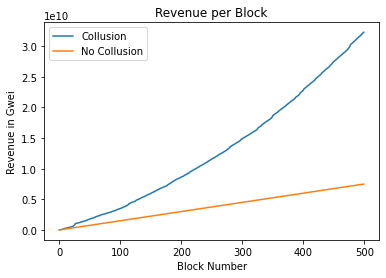

In [15]:
##plot revenue per block
plt.title("Revenue per Block")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(cumsum(sim["Overall Revenues"]), label="Collusion")
plt.plot(cumsum(controll_sim["Overall Revenues"]), label="No Collusion")
plt.legend(loc="upper left")

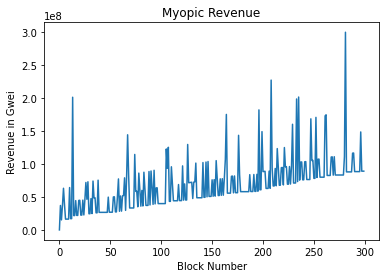

In [16]:
##plot myopic revenue
plt.title("Myopic Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Myopic Revenues"])

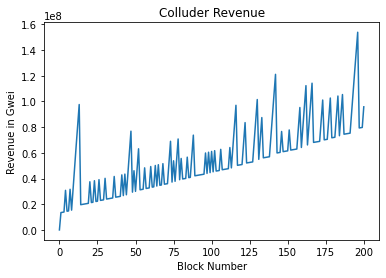

In [17]:
##plot colluder revenue
plt.title("Colluder Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Colluder Revenues"])

Now for 60%

In [18]:
sim = collusion_scenario(.6, 1500000, 500)
controll_sim = collusion_scenario(0, 1500000, 500)

print("Total Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Total Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Total Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Average Colluder Revenue:", sim["Avg Revenue per Colluder"])
print("Average Myopic Revenue:", sim["Avg Revenue per Myopic"])
print("Average Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]) / \
      len(controll_sim["Overall Revenues"]))

Total Revenue Under No Collusion: 7485000000.0
Total Myopic Revenue: 30831835606.48506
Total Colluder Revenues: 35486374641.04061
Average Colluder Revenue: 117116746.99023303
Average Myopic Revenue: 155716340.44689426
Average Revenue Under No Collusion: 14970000.0


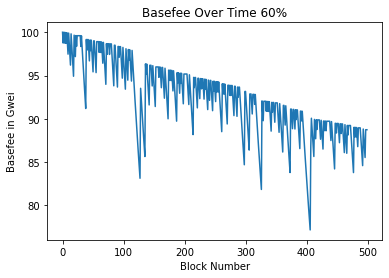

In [19]:
##plot basefee
plt.title("Basefee Over Time 60%")
plt.xlabel("Block Number")
plt.ylabel("Basefee in Gwei")
plt.plot(sim["Basefee"])
#plt.savefig('basefee_collusion_60p')

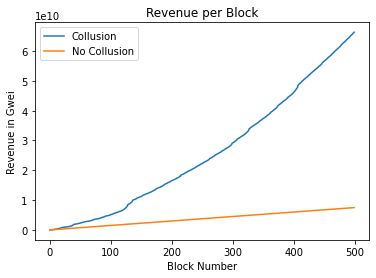

In [20]:
##plot revenue per block
plt.title("Revenue per Block")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(cumsum(sim["Overall Revenues"]), label="Collusion")
plt.plot(cumsum(controll_sim["Overall Revenues"]), label="No Collusion")
plt.legend(loc="upper left")

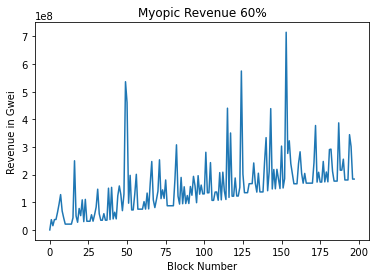

In [21]:
##plot myopic revenue
plt.title("Myopic Revenue 60%")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Myopic Revenues"])
#plt.savefig('myopic_revenue_60p')

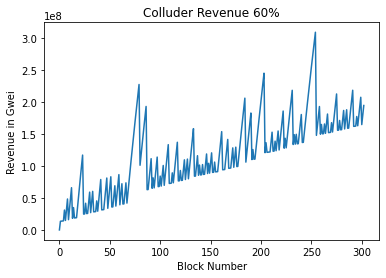

In [22]:
##plot colluder revenue
plt.title("Colluder Revenue 60%")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Colluder Revenues"])
#plt.savefig('colluder_revenue_60p')

Now for 80%

In [23]:
sim = collusion_scenario(.8, 1500000, 500)
controll_sim = collusion_scenario(0, 1500000, 500)

print("Total Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Total Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Total Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Average Colluder Revenue:", sim["Avg Revenue per Colluder"])
print("Average Myopic Revenue:", sim["Avg Revenue per Myopic"])
print("Average Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]) / \
      len(controll_sim["Overall Revenues"]))

Total Revenue Under No Collusion: 7485000000.0
Total Myopic Revenue: 37112987541.64494
Total Colluder Revenues: 97910194825.68399
Average Colluder Revenue: 238805352.23337558
Average Myopic Revenue: 407835026.9301642
Average Revenue Under No Collusion: 14970000.0


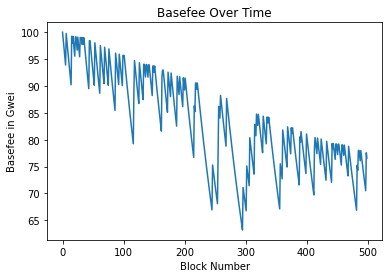

In [24]:
##plot basefee
plt.title("Basefee Over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee in Gwei")
plt.plot(sim["Basefee"])
plt.savefig('basefee_collusion_80p')

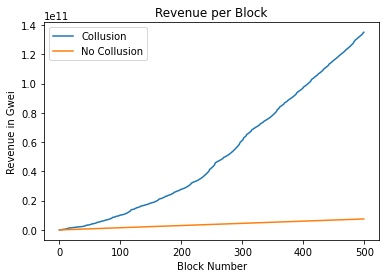

In [25]:
##plot revenue per block
plt.title("Revenue per Block")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(cumsum(sim["Overall Revenues"]), label="Collusion")
plt.plot(cumsum(controll_sim["Overall Revenues"]), label="No Collusion")
plt.legend(loc="upper left")

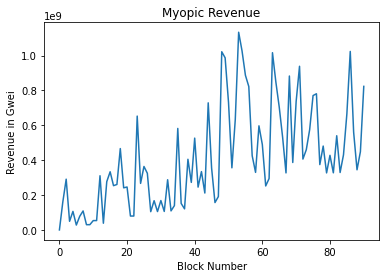

In [26]:
##plot myopic revenue
plt.title("Myopic Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Myopic Revenues"])
plt.savefig('myopic_revenue_80p')

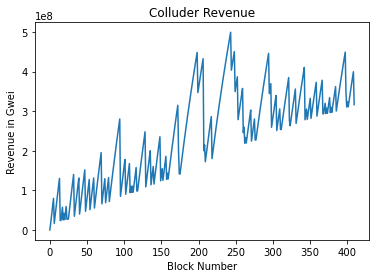

In [27]:
##plot colluder revenue
plt.title("Colluder Revenue")
plt.xlabel("Block Number")
plt.ylabel("Revenue in Gwei")
plt.plot(sim["Colluder Revenues"])
plt.savefig('colluder_revenue_80p')